In [5]:
import pandas as pd
from pymongo import MongoClient

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pylab as py 
import statsmodels.api as sm 

from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency

Connect to DB

In [6]:
client = MongoClient('localhost', 27017)
db = client['GithubRepo']
Documentation_Record = db['Documentation_Record']

Convert it into pandas dataframe

In [7]:
df = pd.DataFrame(list(Documentation_Record.find()))

print(df.columns)

# drop the _id column
df = df.drop(['_id'], axis=1)
print(df)

Index(['_id', 'url', 'changes_of_documentation', 'filesize_of_documentation',
       'lines_of_documentation', 'name', 'number_of_documentation', 'owner',
       'popularity', 'popular_level', 'has_license'],
      dtype='object')
                                                  url   
0                 https://github.com/emberjs/ember.js  \
1                  https://github.com/CesiumGS/cesium   
2                    https://github.com/meteor/meteor   
3           https://github.com/bgoonz/BGOONZ_BLOG_2.0   
4             https://github.com/travis-ci/travis-web   
5               https://github.com/LiskHQ/lisk-mobile   
6           https://github.com/apache/cordova-android   
7                       https://github.com/nwjs/nw.js   
8               https://github.com/apache/cordova-ios   
9                    https://github.com/r-40021/bingo   
10                   https://github.com/gruntjs/grunt   
11    https://github.com/copenhagenjs/copenhagenjs.dk   
12                  https://

In [8]:
# seperate df into popular_df and unpopular_df
# use popular_level to seperate
js_popular_df = df[df['popular_level'] == 'high']
js_unpopular_df = df[df['popular_level'] == 'low']

print(js_popular_df.shape)
print(js_unpopular_df.shape)

(30, 10)
(30, 10)


Use Shapiro-Wilk test test for normality

In [9]:
# from scipy.stats import shapiro

def shapiro_test(df):
    for column in ['number_of_documentation', 'lines_of_documentation', 'changes_of_documentation', 'filesize_of_documentation']:
        stat, p = shapiro(df[column])
        print(f'{column}: Statistics={stat:.4f}, p={p:.4g}')
        if p > 0.05:
            print(f"The data in {column} seems to follow a normal distribution (fail to reject H0).\n")
        else:
            print(f"The data in {column} does not seem to follow a normal distribution (reject H0).\n")

In [10]:
print("Shapiro Test for popular df: \n")
shapiro_test(js_popular_df)
print("")
print("Shapiro Test for unpopular df: \n")
shapiro_test(js_unpopular_df)

Shapiro Test for popular df: 

number_of_documentation: Statistics=0.4993, p=5.264e-09
The data in number_of_documentation does not seem to follow a normal distribution (reject H0).

lines_of_documentation: Statistics=0.2556, p=3.037e-11
The data in lines_of_documentation does not seem to follow a normal distribution (reject H0).

changes_of_documentation: Statistics=0.2205, p=1.598e-11
The data in changes_of_documentation does not seem to follow a normal distribution (reject H0).

filesize_of_documentation: Statistics=0.2801, p=4.817e-11
The data in filesize_of_documentation does not seem to follow a normal distribution (reject H0).


Shapiro Test for unpopular df: 

number_of_documentation: Statistics=0.2002, p=1.114e-11
The data in number_of_documentation does not seem to follow a normal distribution (reject H0).

lines_of_documentation: Statistics=0.1892, p=9.186e-12
The data in lines_of_documentation does not seem to follow a normal distribution (reject H0).

changes_of_documentat

QQ plot for popular df: 



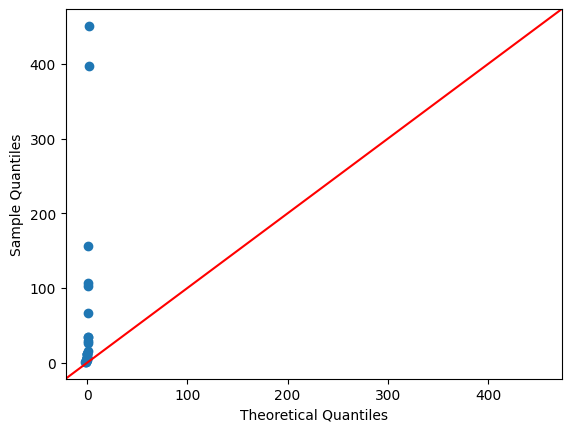


QQ plot for unpopular df: 



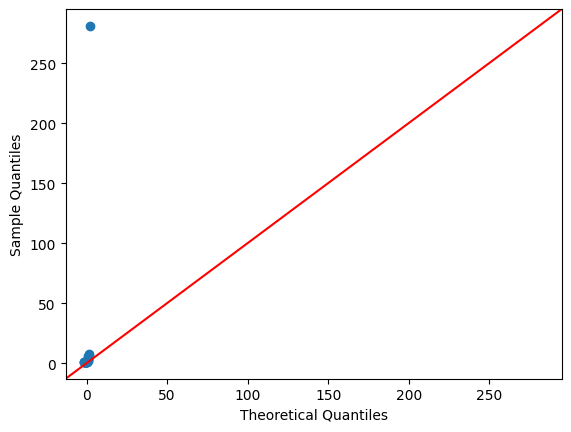

In [11]:
# plot Q-Q plot for four columns, to check if the data is normally distributed
# plot it on a subplot, 2 rows and 4 columns
def qq_plot(df):
    for column in ['number_of_documentation']:
        sm.qqplot(df[column], line ='45')
        py.show()

print("QQ plot for popular df: \n")
qq_plot(js_popular_df)
print("")
print("QQ plot for unpopular df: \n")
qq_plot(js_unpopular_df)

In [12]:
# descriptive statistics for each column in both popular and unpopular dataframes
print("js_popular_df")
print(js_popular_df[['number_of_documentation', 'changes_of_documentation', 'lines_of_documentation', 'filesize_of_documentation']].describe())
print()

print("js_unpopular_df")
print(js_unpopular_df[['number_of_documentation', 'changes_of_documentation', 'lines_of_documentation', 'filesize_of_documentation']].describe())

js_popular_df
       number_of_documentation  changes_of_documentation   
count                30.000000                 30.000000  \
mean                 50.800000               6065.533333   
std                 108.186748              27329.268302   
min                   1.000000                  1.000000   
25%                   3.500000                 65.500000   
50%                   9.000000                237.000000   
75%                  32.750000                973.250000   
max                 451.000000             150382.000000   

       lines_of_documentation  filesize_of_documentation  
count               30.000000               3.000000e+01  
mean             13718.900000               6.912425e+05  
std              55428.716849               2.584054e+06  
min                  6.000000               5.080000e+02  
25%                162.250000               1.136025e+04  
50%                679.000000               4.370100e+04  
75%               2613.250000   

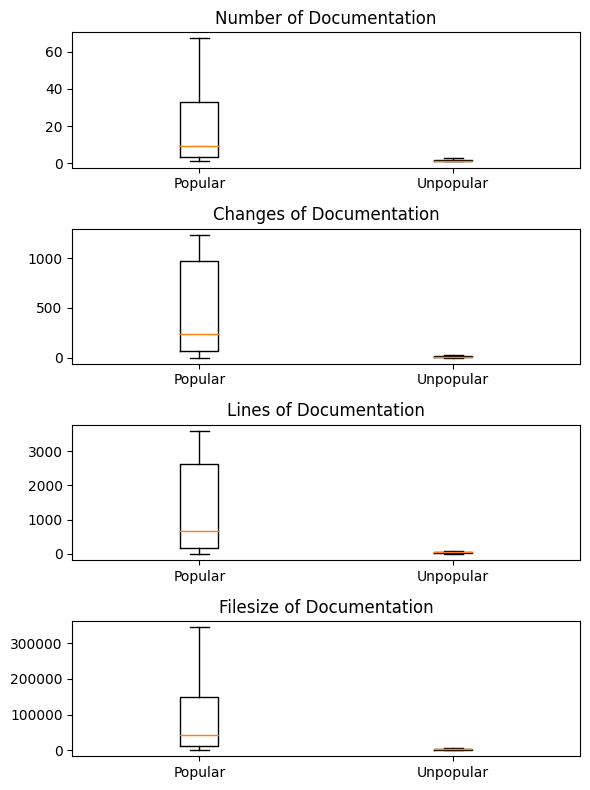

In [13]:
# Create a figure with six subplots, arranged in 4 rows and 1 columns
fig, axes = plt.subplots(4, 1, figsize=(6, 8))

# Define column names and titles
columns = ['number_of_documentation', 'changes_of_documentation', 'lines_of_documentation', 'filesize_of_documentation']
titles = ['Number of Documentation', 'Changes of Documentation', 'Lines of Documentation', 'Filesize of Documentation']

# Loop through each metric to plot
for i, (column, title) in enumerate(zip(columns, titles)):
    # Combine data from popular and unpopular dataframes for plotting
    data_to_plot = [js_popular_df[column], js_unpopular_df[column]]
    
    # Plot boxplot for popular and unpopular dataframes without outliers
    axes[i].boxplot(data_to_plot, showfliers=False)
    axes[i].set_title(title)
    axes[i].set_xticklabels(['Popular', 'Unpopular'])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

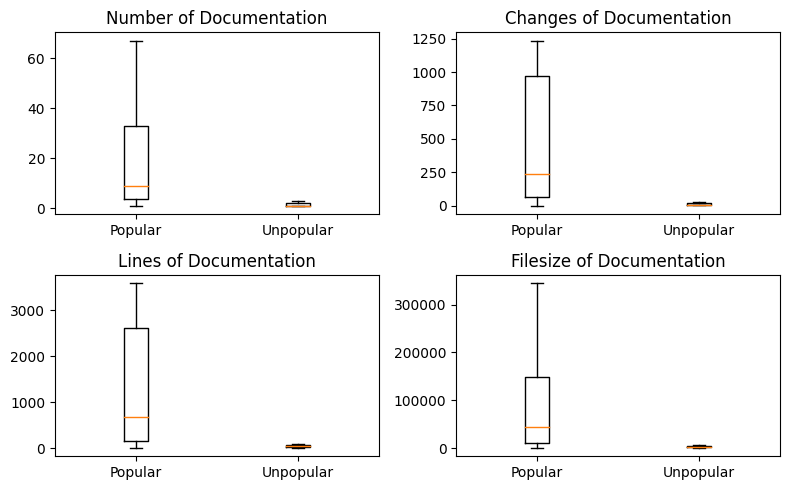

In [14]:
# Create a figure with six subplots, arranged in 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(8, 5))

# Define column names and titles
columns = ['number_of_documentation', 'changes_of_documentation', 'lines_of_documentation', 'filesize_of_documentation']
titles = ['Number of Documentation', 'Changes of Documentation', 'Lines of Documentation', 'Filesize of Documentation']

# Loop through each metric to plot
for i, (column, title) in enumerate(zip(columns, titles)):
    # Calculate the subplot position based on the index
    row = i // 2
    col = i % 2
    
    # Combine data from popular and unpopular dataframes for plotting
    data_to_plot = [js_popular_df[column], js_unpopular_df[column]]
    
    # Plot boxplot for popular and unpopular dataframes without outliers
    axes[row, col].boxplot(data_to_plot, showfliers=False)
    axes[row, col].set_title(title)
    axes[row, col].set_xticklabels(['Popular', 'Unpopular'])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [16]:
df.head(1)
df['popularity'].describe()

count    6.000000e+01
mean     2.966738e+06
std      1.442684e+07
min      8.300000e+01
25%      9.400000e+01
50%      2.674800e+04
75%      1.704810e+05
max      1.054586e+08
Name: popularity, dtype: float64

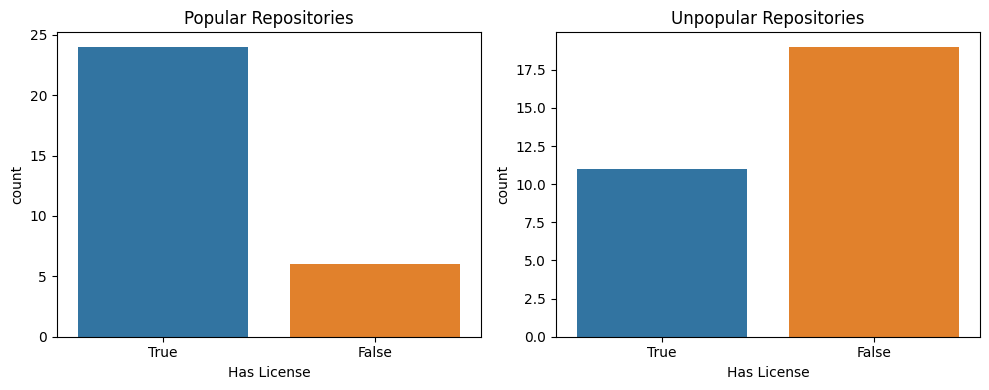

In [17]:
# Box plot of value count for has_license column for popular and unpopular dataframes
# Create a figure with two subplots, arranged in 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Define the order of categories to be displayed on the x-axis
category_order = [True, False]

# Use seaborn's countplot to plot value counts for has_license column in popular and unpopular dataframes
sns.countplot(x='has_license', data=js_popular_df, order=category_order, ax=axes[0])
sns.countplot(x='has_license', data=js_unpopular_df, order=category_order, ax=axes[1])

# Set titles for subplots
axes[0].set_title('Popular Repositories')
axes[1].set_title('Unpopular Repositories')

# Set the x-axis labels
axes[0].set_xlabel('Has License')
axes[1].set_xlabel('Has License')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Correlation Matrix

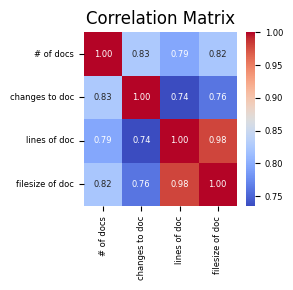

In [43]:
df_corr = df[['number_of_documentation', 'changes_of_documentation', 'lines_of_documentation', 'filesize_of_documentation']].corr(method='spearman')

# Create a figure without subplots
fig, ax = plt.subplots(1, 1, figsize=(3, 3))

# Use seaborn's heatmap function to plot the correlation matrix
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap='coolwarm', square=False, ax=ax, annot_kws={"size": 6})

# Set the title of the heatmap
custom_labels = ['# of docs', 'changes to doc', 'lines of doc', 'filesize of doc']
ax.set_title('Correlation Matrix')
ax.set_xticklabels(custom_labels, rotation=90, fontsize=6)
ax.set_yticklabels(custom_labels, rotation=0, fontsize=6)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=6)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# # Create a figure with a two subplot, one for popular and one for unpopular
# fig, axes = plt.subplots(1, 2, figsize=(10, 10))

# # Define the correlation matrix for popular and unpopular dataframes
# popular_corr = js_popular_df[['number_of_documentation', 'changes_of_documentation', 'lines_of_documentation', 'filesize_of_documentation']].corr(method='spearman')
# unpopular_corr = js_unpopular_df[['number_of_documentation', 'changes_of_documentation', 'lines_of_documentation', 'filesize_of_documentation']].corr(method='spearman')

# # Find global minimum and maximum for the color scale across both correlation matrices
# vmin = min(popular_corr.min().min(), unpopular_corr.min().min())
# vmax = max(popular_corr.max().max(), unpopular_corr.max().max())

# # Plot the correlation matrix for popular and unpopular dataframes with a unified color scale
# popular_corr_plot = axes[0].matshow(popular_corr, cmap='coolwarm', vmin=vmin, vmax=vmax)
# unpopular_corr_plot = axes[1].matshow(unpopular_corr, cmap='coolwarm', vmin=vmin, vmax=vmax)

# # Add colorbar to the first subplot (Popular)
# divider = make_axes_locatable(axes[0])
# cax = divider.append_axes("right", size="5%", pad=0.15)
# plt.colorbar(popular_corr_plot, cax=cax)

# # Add colorbar to the first subplot (Unpopular)
# divider = make_axes_locatable(axes[1])
# cax = divider.append_axes("right", size="5%", pad=0.15)
# plt.colorbar(unpopular_corr_plot, cax=cax)

# # Set the title for the popular and unpopular correlation matrix
# axes[0].set_title('Popular')
# axes[1].set_title('Unpopular')

# # Set tick marks for x and y axis
# tick_positions = range(len(popular_corr.columns))

# # Set the tick positions and labels for the x-axis
# for ax in axes:
#     ax.set_xticks(tick_positions)
#     ax.set_xticklabels(popular_corr.columns, rotation=90)
#     ax.set_yticks(tick_positions)
#     ax.set_yticklabels(popular_corr.index)

#     # Manually adjust the position of the top tick labels if needed
#     ax.tick_params(axis='x', which='both', pad=8)

# # Adjust layout and display the plot
# plt.tight_layout()
# # fig.suptitle('Correlation Matrices for Popular and Unpopular Repositories', fontsize=16)
# plt.show()

Mann-Whitney U test

In [22]:
# from scipy.stats import mannwhitneyu

# Mann-Whitney U test for each column
columns = ['number_of_documentation', 'changes_of_documentation', 'lines_of_documentation', 'filesize_of_documentation']
test_results = {}
for column in columns:
    stat, p_value = mannwhitneyu(js_popular_df[column], js_unpopular_df[column])
    test_results[column] = {'stat': stat, 'p_value': p_value}

test_results

{'number_of_documentation': {'stat': 757.5, 'p_value': 3.716856829334007e-06},
 'changes_of_documentation': {'stat': 772.5,
  'p_value': 1.9045336336218044e-06},
 'lines_of_documentation': {'stat': 778.5, 'p_value': 1.2348302632165476e-06},
 'filesize_of_documentation': {'stat': 791.0,
  'p_value': 4.801068993625725e-07}}

Given a common alpha level of 0.05, all four p-values are less than 0.05, which suggests that there is a statistically significant difference in the number of documentation files, lines of documentation, changes of documentation, filesize of documentation between popular and unpopular repositories. This indicates that the presence of documentation may be associated with a repository's popularity. However, the direction of the association (whether more or fewer documentation attributes contribute to popularity) would require further analysis.

Effect size - Cohen'd Value

In [68]:
def cohen_d_value(group1, group2):
    # Calculate the means and standard deviations of the groups
    mean1, mean2 = np.mean(group1), np.mean(group2)
    sd1, sd2 = np.std(group1, ddof=1), np.std(group2, ddof=1)
    n1, n2 = len(group1), len(group2)

    # Calculate the pooled standard deviation
    sd_pooled = np.sqrt(((n1 - 1) * sd1 ** 2 + (n2 - 1) * sd2 ** 2) / (n1 + n2 - 2))

    # Calculate Cohen's d and print it
    d = (mean1 - mean2) / sd_pooled
    print(f"Cohen's d Value: {d}")

    # Interpret the effect size
    if abs(d) <= 0.5:
        print('The effect size is small. \n')
    elif 0.5 < abs(d) <= 0.8:
        print('The effect size is medium. \n')
    else:
        print('The effect size is large. \n')

# Calculate Cohen's d for each column
for column in columns:
    print(f"Cohen's d for {column}:")
    cohen_d_value(js_popular_df[column], js_unpopular_df[column])

Cohen's d for number_of_documentation:
Cohen's d Value: 0.466333889103926
The effect size is small. 

Cohen's d for changes_of_documentation:
Cohen's d Value: 0.30993255790413693
The effect size is small. 

Cohen's d for lines_of_documentation:
Cohen's d Value: 0.31840483828743016
The effect size is small. 

Cohen's d for filesize_of_documentation:
Cohen's d Value: 0.34589898870925984
The effect size is small. 



Chi-Squared Test

In [75]:
# from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['has_license'], df['popular_level'])

# Perform the Chi-Squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print("Chi-Squared Statistic: ", chi2)
print("P-value ", p)
print("Degree of Freedom: ", dof)
print("Expected Frequencies: ", expected)

Chi-Squared Statistic:  9.874285714285714
P-value  0.0016760465035296384
Degree of Freedom:  1
Expected Frequencies:  [[12.5 12.5]
 [17.5 17.5]]


Since the p-value is much lower than the typical alpha level of 0.05, the results are statistically significant. This suggests that there is a significant association between having a license (has_license) and the popularity level (popular_level) of the repositories. 

The chi-squared statistic is relatively large, which, when combined with a low p-value, supports the conclusion of a significant association.

The expected frequencies show what the distribution of the counts would be if there was no association. By comparing these with the actual counts from your data, you can get a sense of how strong the association might be. For instance, if the actual counts deviate substantially from the expected counts, it suggests a stronger association.

Effect size - Cramer's V value

In [67]:
def cramer_v_value(contingency_table):
    # Calculate the chi-squared statistic
    chi2, _, _, _ = chi2_contingency(contingency_table)

    # Calculate the number of observations
    n = contingency_table.sum().sum()

    # Calculate the minimum of the number of rows and columns
    min_dim = min(contingency_table.shape)

    # Calculate Cramer's V
    v = np.sqrt(chi2 / (n * (min_dim - 1)))

    return v

# determine the effect size for has_license column
# Create a contingency table
contingency_table = pd.crosstab(df['has_license'], df['popular_level'])

# Calculate Cramer's V for the contingency table
cramer_v = cramer_v_value(contingency_table)
print(f"Cramer's V Value: {cramer_v:.4f}")

# Interpret the effect size
if cramer_v <= 0.10:
    print('The effect size is small. \n')
elif 0.10 <= cramer_v < 0.30:
    print('The effect size is medium. \n')
else:
    print('The effect size is large. \n')

Cramer's V Value: 0.4057
The effect size is large. 

